In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158


In [4]:
df

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
295,0.615160,3.892790
296,0.524208,15.616094
297,0.647608,4.596190
298,0.410353,18.160583


In [5]:
df.describe()

,Humidity,Temperature
count,300.000000,300.000000
mean,0.535887,14.981862
std,0.169164,11.144964
min,0.000000,-21.684834
25%,0.424500,8.290974
50%,0.537120,14.907001
75%,0.649772,22.408376
max,1.000000,43.825049


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     300 non-null    float64
 1   Temperature  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [7]:
X=np.array(df.Humidity)

In [8]:
Y=np.array(df.Temperature)

In [9]:
X,Y


(array([0.59660557, 0.6565718 , 0.14185593, 0.75736019, 0.6132277 ,
        1.        , 0.37765582, 0.81530631, 0.14710403, 0.54084904,
        0.40111164, 0.63795111, 0.50777642, 0.38660157, 0.26278949,
        0.55632409, 0.42536876, 0.28533024, 0.77777599, 0.48510097,
        0.33574147, 0.20408699, 0.45590515, 0.58986282, 0.69648899,
        0.56542957, 0.56236459, 0.50741162, 0.38802306, 0.33265169,
        0.32438614, 0.73042008, 0.53763537, 0.65501707, 0.40179825,
        0.3972744 , 0.76659457, 0.22934167, 0.53596045, 0.44169333,
        0.44045941, 0.53305128, 0.59670778, 0.46666197, 0.44827408,
        0.16963849, 0.54819735, 0.65141242, 0.59178375, 0.42459148,
        0.48198196, 0.65099628, 0.53705886, 0.60767965, 0.36413304,
        0.61034979, 0.40781685, 0.32579409, 0.45135186, 0.89737381,
        0.44387831, 0.49379625, 0.50898006, 0.7004272 , 0.52203071,
        0.08431073, 0.4324858 , 0.5785368 , 0.57279435, 0.4085181 ,
        0.5201755 , 0.70860478, 0.18006175, 0.74

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [12]:
def plot_points(X,Y,x_label,y_label):
    plt.plot(X,Y,'o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

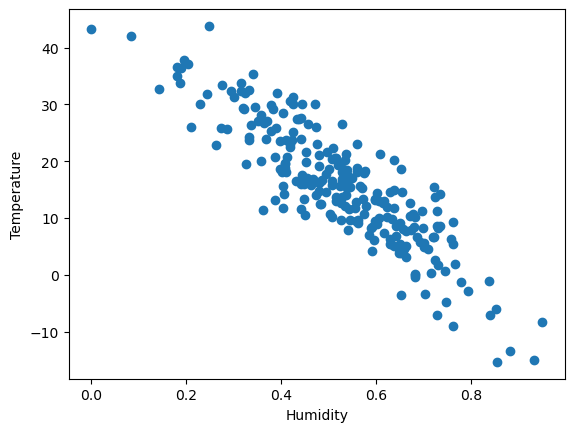

In [13]:
plot_points(x_train,y_train,"Humidity","Temperature")

In [14]:
np.random.seed(2)
theta=np.random.rand(2,1)

def hypothesis(X,theta): 
    return theta[0]+theta[1]*X

In [15]:
def draw_line(theta):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals,y_vals,'--')

In [16]:
def draw_points_and_lines(X,Y,x_label,y_label,theta):
    plot_points(X,Y,x_label,y_label)
    draw_line(theta)

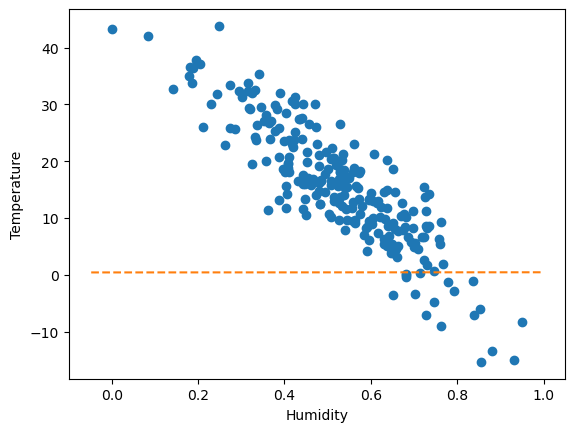

In [17]:
draw_points_and_lines(x_train,y_train,"Humidity","Temperature",theta)

In [18]:
m = len(X)
def cost(X,Y,theta):
    return (1/(2*m))*np.sum((hypothesis(X, theta)-Y)**2)

In [19]:
cost(x_train,y_train,theta)

138.29172239428638

In [20]:
def gradientdescent(X,Y,theta,alpha,steps):
    for i in range(steps):
        old_cost = cost(X,Y,theta)
        temp0 = theta[0]-alpha*((1/m)*np.sum(hypothesis(X,theta)-Y))
        temp1 = theta[1]-alpha*((1/m)*np.dot((hypothesis(X,theta)-Y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X,Y,theta)
        if new_cost > old_cost:
            print("Cost Increasing")
        else:
            print("Cost Decreasing", new_cost)

In [21]:
theta

array([[0.4359949 ],
       [0.02592623]])

In [22]:
gradientdescent(x_train,y_train,theta,alpha=0.02,steps=10000)

Cost Decreasing 134.81735942060922
Cost Decreasing 131.48290426863556
Cost Decreasing 128.28267988306538
Cost Decreasing 125.21123959454216
Cost Decreasing 122.26335777012594
Cost Decreasing 119.43402084318922
Cost Decreasing 116.71841870733763
Cost Decreasing 114.11193645958281
Cost Decreasing 111.61014647859395
Cost Decreasing 109.20880082442993
Cost Decreasing 106.90382394670574
Cost Decreasing 104.6913056886761
Cost Decreasing 102.56749457522764
Cost Decreasing 100.5287913732579
Cost Decreasing 98.57174291338701
Cost Decreasing 96.69303616239714
Cost Decreasing 94.88949253622381
Cost Decreasing 93.15806244373816
Cost Decreasing 91.4958200519529
Cost Decreasing 89.89995826366734
Cost Decreasing 88.36778389892932
Cost Decreasing 86.8967130720434
Cost Decreasing 85.48426675618933
Cost Decreasing 84.12806652803717
Cost Decreasing 82.82583048505474
Cost Decreasing 81.57536932849875
Cost Decreasing 80.37458260536627
Cost Decreasing 79.2214551028552
Cost Decreasing 78.11405338914507
Cost 

Cost Decreasing 13.6834241155603
Cost Decreasing 13.681191176343777
Cost Decreasing 13.678959645658137
Cost Decreasing 13.676729522614892
Cost Decreasing 13.6745008063261
Cost Decreasing 13.672273495904381
Cost Decreasing 13.670047590462929
Cost Decreasing 13.66782308911548
Cost Decreasing 13.665599990976334
Cost Decreasing 13.663378295160362
Cost Decreasing 13.661158000782972
Cost Decreasing 13.658939106960146
Cost Decreasing 13.656721612808418
Cost Decreasing 13.65450551744488
Cost Decreasing 13.652290819987181
Cost Decreasing 13.65007751955353
Cost Decreasing 13.64786561526268
Cost Decreasing 13.645655106233955
Cost Decreasing 13.64344599158723
Cost Decreasing 13.641238270442924
Cost Decreasing 13.639031941922031
Cost Decreasing 13.63682700514608
Cost Decreasing 13.63462345923717
Cost Decreasing 13.632421303317944
Cost Decreasing 13.630220536511597
Cost Decreasing 13.62802115794189
Cost Decreasing 13.625823166733117
Cost Decreasing 13.623626562010138
Cost Decreasing 13.6214313428983

Cost Decreasing 10.388605375233817
Cost Decreasing 10.38845079709821
Cost Decreasing 10.388296316469997
Cost Decreasing 10.388141933287667
Cost Decreasing 10.387987647489751
Cost Decreasing 10.387833459014823
Cost Decreasing 10.387679367801491
Cost Decreasing 10.387525373788398
Cost Decreasing 10.387371476914236
Cost Decreasing 10.387217677117729
Cost Decreasing 10.387063974337636
Cost Decreasing 10.386910368512767
Cost Decreasing 10.38675685958196
Cost Decreasing 10.38660344748409
Cost Decreasing 10.38645013215808
Cost Decreasing 10.386296913542884
Cost Decreasing 10.386143791577501
Cost Decreasing 10.385990766200962
Cost Decreasing 10.385837837352335
Cost Decreasing 10.385685004970737
Cost Decreasing 10.385532268995316
Cost Decreasing 10.385379629365259
Cost Decreasing 10.385227086019787
Cost Decreasing 10.38507463889817
Cost Decreasing 10.384922287939705
Cost Decreasing 10.384770033083736
Cost Decreasing 10.384617874269644
Cost Decreasing 10.384465811436842
Cost Decreasing 10.384313

In [23]:
theta


array([[ 45.24619654],
       [-56.35892739]])

In [24]:
cost(x_train,y_train,theta)

10.222107140857595

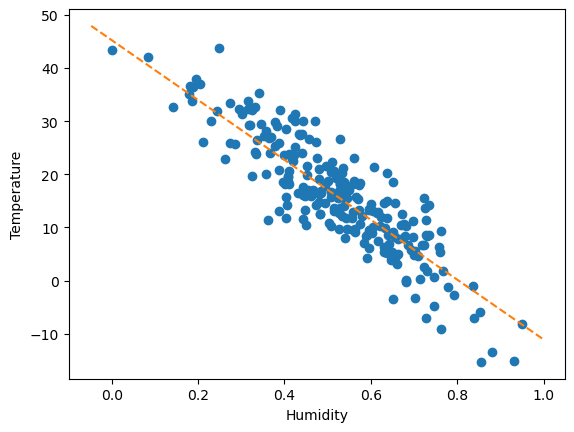

In [25]:
draw_points_and_lines(x_train,y_train,"Humidity","Temperature",theta)


In [27]:
y_predict = hypothesis(x_test,theta)
df = pd.DataFrame({'actual':y_test, 'predicted': y_predict})

In [28]:
df

,actual,predicted
0,6.918243,8.133340
1,24.203971,25.302423
2,17.560260,16.628462
3,-5.433452,5.148425
4,9.650354,11.744665
5,-4.253388,2.168339
6,1.325959,6.073666
7,9.074647,14.312585
8,14.448332,14.978135
9,-4.202040,-8.835854


In [29]:
hypothesis([1],theta)

array([-11.11273085])

In [30]:
y_train_predict = hypothesis(x_train, theta)
# Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 4.088423597747075
Mean Squared Error: 25.555267852143984
Root Mean Squared Error: 5.0552218400525195


In [31]:
# Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4.007632913528168
Mean Squared Error: 26.25413418115797
Root Mean Squared Error: 5.123878821865127
